### KNN实战

![image](picture/dating.png)

In [ ]:
import numpy as np
import os

def file2matrix(filename):
    # 读取数据
    file = open(filename)
    # 读取全部数据
    allLines = file.readlines()
    # 计算数据数量
    numbers = len(allLines)
    # 返回矩阵，解析三行数据
    returnMat = np.zeros((numbers,3))
    # 分类标签向量
    classLabel = []
    # 行索引
    index = 0
    # 数据处理
    for line in allLines:
        # 删除空白符
        line = line.strip()
        # 根据“\t”切分
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if listFromLine[3] == 'didntLike':
            classLabel.append(1)
        elif listFromLine[3] =='smallDoses':
            classLabel.append(2)
        else:
            classLabel.append(3)
        index+=1
    return returnMat, classLabel

# if __name__=='main':
#     filename = "dataset\datingTestSet.txt"
#     datingDate, datingLabels = file2matrix(filename)
#     print(datingDate)
#     print(datingLabels)

filename = "dataset\datingTestSet.txt"
datingDate, datingLabels = file2matrix(filename)
print(datingDate)
print(datingLabels)


[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

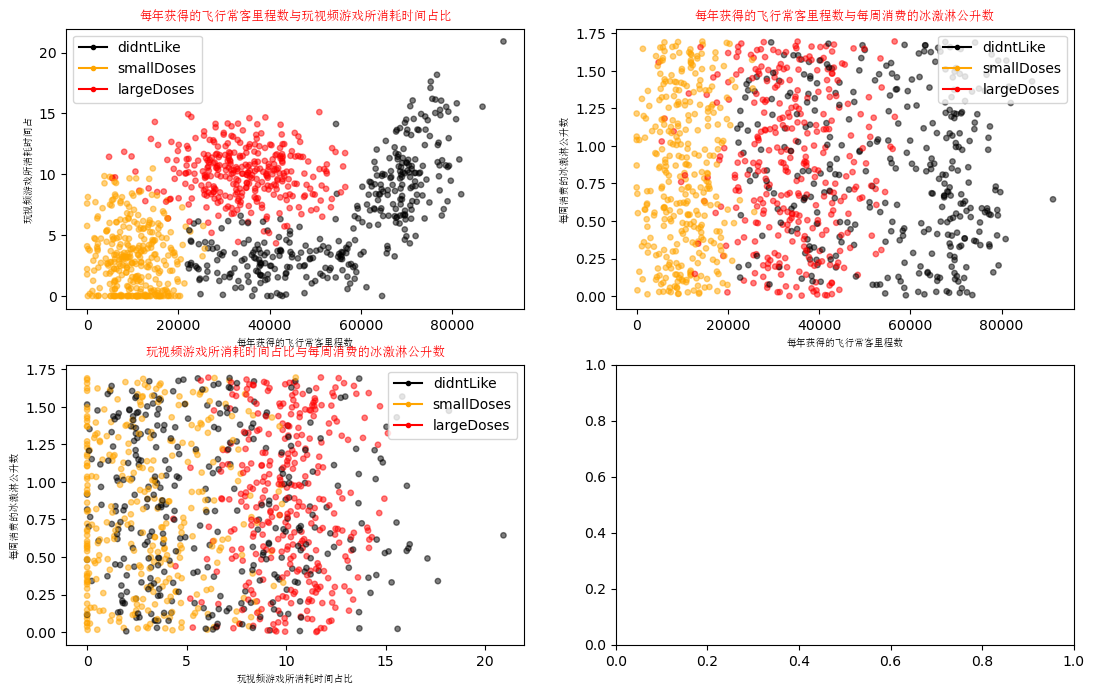

In [3]:
# 数据可视化
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))
 
    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',fontproperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',fontproperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',fontproperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',fontproperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',fontproperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',fontproperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',fontproperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',fontproperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',fontproperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

showdatas(datingDate, datingLabels)

In [9]:
# 数据归一化
def autoNorm(dataset):
    # 求列方向的最大最小值
    minVal = dataset.min(0)
    maxVal = dataset.max(0)
    # 范围
    range_max_min = maxVal - minVal
    # 根据数据及生成对应矩阵形状（为了记录结果
    matrix = np.zeros(np.shape(dataset))
    # 行数
    m = dataset.shape[0]
    # tile是平铺，这里可以理解为使用range_max_min这个值（其实是个向量），平铺m行
    matrix = dataset - np.tile(minVal,[m,1])
    matrix = matrix / np.tile(range_max_min,[m,1])

    return matrix , range_max_min, minVal

autoNorm(datingDate)


(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]], shape=(1000, 3)),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

In [11]:
import operator
# KNN算法分类器
def KNN(inX,dataset,labels,k):
    # 行数
    m = dataset.shape[0]
    # 计算差异值
    # inX应该就是预测值
    # 欧氏距离
    diff = (np.tile(inX,[m,1]) - dataset)**2
    diff = diff.sum(axis=1)
    diff = diff**0.5
    # 排序
    # argsort 得到的是根据数值排序之后的索引值
    sort_diff = diff.argsort()
    # 记录类别次数的字典
    classCount = {}
    for i in range(k):
        # 选出k个
        getlabel = labels[sort_diff[i]]
        classCount[getlabel] = classCount.get(getlabel,0)+1
    # 排序选出来的次数最多的类别（众数）
    # key=operator.itemgetter(1) 表示按元组的第二个元素（值）排序。
    # classCount = {'A': 5, 'B': 3, 'C': 8}  # 类别A出现5次，B出现3次，C出现8次
    # 比较次数
    sort_label = sorted(classCount.items(),key = operator.itemgetter(1),reverse=True)
    return sort_label[0][0]

In [12]:
# 综合计算
def datingClassTest():
    filename = "dataset\datingTestSet.txt"
    datingMatrix,datingLabel = file2matrix(filename)
    # 取部分数据
    hoRatio = 0.10
    # 归一化
    normMatrix,ranges, minValue = autoNorm(datingMatrix)
    # 行数
    m = normMatrix.shape[0]
    # 测试个数是十分之一
    numTest = int(m*hoRatio)
    # 分类错误计数
    errorCount = 0.0
    for i in range(numTest):
                #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = KNN(normMatrix[i,:], normMatrix[numTest:m,:],
            datingLabel[numTest:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabel[i]))
        if classifierResult != datingLabel[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTest)*100))

datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

In [ ]:
def classifyPerson():
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    #三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    #打开的文件名
    filename = "dataset\datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    #训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #生成NumPy数组,测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    #测试集归一化
    norminArr = (inArr - minVals) / ranges
    #返回分类结果
    classifierResult = KNN(norminArr, normMat, datingLabels, 3)
    #打印结果
    print("你可能%s这个人" % (resultList[classifierResult-1]))
classifyPerson()

你可能有些喜欢这个人
